# SN Requiem Color-Mag classification overview figure

This is Figure 2 in the paper. 

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
import colorcolorfig
import snRequiem_color_mag_classification as colormag
import plottools

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.patches import ConnectionPatch


import pickle
#import glob,os
import numpy as np
import astropy
from astropy.io import ascii
from astropy.table import Table

import sncosmo

In [5]:
#rcParams['text.usetex'] = True
rcParams['figure.figsize']=[6,4]
rcParams['figure.dpi']=300
rcParams['font.size']=12    # text big enough for a half-page fig
rcParams['axes.labelsize'] = 12      # fontsize of the x and y labels
rcParams['axes.titlesize'] = 12      # fontsize of the axes title
rcParams['xtick.labelsize'] = 12      # fontsize of the x and y labels
rcParams['ytick.labelsize'] = 12      # fontsize of the x and y labels
rcParams['lines.linewidth']=1.5
rcParams['lines.color']='k'     # thicker black lines 
rcParams['lines.markersize']=6
rcParams['lines.markeredgewidth']=1.     # big fat points
rcParams['axes.linewidth']=1.
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['xtick.major.width'] = 1.5      # major tick thickness in points
rcParams['xtick.minor.width'] = 1.2      # major tick thickness in points
rcParams['xtick.major.size'] = 6      # major tick size in points
rcParams['xtick.minor.size'] = 4      # minor tick size in points
rcParams['xtick.major.pad'] = 5      # distance to major tick label in points
rcParams['xtick.minor.pad'] = 5      # distance to the minor tick label in points
rcParams['ytick.major.width'] = 1.5      # major tick thickness in points
rcParams['ytick.minor.width'] = 1.2      # major tick thickness in points
rcParams['ytick.major.size'] = 6      # major tick size in points
rcParams['ytick.minor.size'] = 4      # minor tick size in points
rcParams['ytick.major.pad'] = 5      # distance to major tick label in points
rcParams['ytick.minor.pad'] = 5      # distance to the minor tick label in points
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

### Set color and mag ranges for the plots below

(setting this up here, b/c these are used in constructing the marginalized histograms)

In [62]:
color_range_wide = [-1.4, 3.2]
mag_range_wide = [28.5, 21.8] 

color_range_zoom = [-0.4, 2.4]
mag_range_zoom = [28.1, 24] 

colorbinwidth = 0.1

# Parameters for the filled contours in the main panel
contour_range = [[24,29.5],[-1.5,4.0]]
nbins = 12

## Read in the lensed SN data for plotting

Also read in the lens model magnification and time delay predictions.

In [7]:
snreq = colormag.LensedSupernova('sn_photometry_final.txt', 'lensmodels_final.txt')

## Load the pre-made sncosmo simulations

In [8]:
clobber = 0 # if >1 will overwrite a pickle, otherwise will load the pickle with snroot
nsim = 10000 # number of sample points for each SN class.

# Root names of the pre-run simulations 
# snroots = ['sim_SN2','sim_SN2_wide','sim_SN1','sim_SN3','sim_full_paramspace']
# snroot_distinguish = str(int(nsim))
# snroots = [i+'_'+snroot_distinguish for i in snroots]


# load (or run) a simulation that has nsim SN, each with a single observation 
# t0 is the observer-frame time corresponding to the source’s phase=0. 
# We do uniform random sampling in phase, 
# roughly spanning the range -20 < t< 120 rest-frame days relative to peak brightness
sim_all3ims = colormag.sncosmo_sim(
    snroot='sim_full_paramspace',
    z_range=[1.94,1.96], t0_range=[-60,360],
    c_distrib=[0.0, 0.1], x1_distrib=[0.5, 1.],
    filterset='kfo',nsim=nsim, verbose=clobber, clobber=clobber,
    mwdust=clobber, mwEBV=.018)

# unpack the sncosmo simulations tuple (3 pickles)
sim1, sim2, sim3 = sim_all3ims

## Make the histograms 

showing marginalized distribution over color with host priors applied

In [63]:
# Each simulation has the same number of MC samples.  To show the expected relative rates 
# we rescale the marginalized histograms.  Here are the fractions of SNe expected in each sub-class,
# based on the host galaxy mass and SFR (following Li+Hjorth 2011), 
# and adopting the rel. rates from Li+2011 for the Ib/c and II split
priors_from_host_data = {'Ia':0.624, 'II':0.358*(57./(57+19)), 'Ibc':0.358*(19./(57+19))}

# Get the marginalized distribution for each SN class
histxbins = np.arange(color_range_zoom[0], color_range_zoom[1] + colorbinwidth, colorbinwidth)
histxvals_list = []
for sim in sim_all3ims:
    histrescalefactor = priors_from_host_data[sim.sntype]
    m160, m105, m160 = colormag.get_magnitude_arrays_from_sim(sim, 'f160w', 'f105w', 'f160w')
    histxvals, histbinout = np.histogram(m105-m160, bins=histxbins, density=True)
    histxvals_list.append(histxvals * histrescalefactor)

## Color-mag classification figure in 3 parts

/Users/rodney/Dropbox/src/snRequiem/Analysis/Classification/snRequiem_color_mag_classification.py:689: UserWarning: The following kwargs were not used by contour: 'ls'
  ax.contour( x[:-1], y[:-1], cabove, **plotargfinal )
/Users/rodney/Dropbox/src/snRequiem/Analysis/Classification/snRequiem_color_mag_classification.py:690: UserWarning: The following kwargs were not used by contour: 'ls'
  ax.contourf( x[:-1], y[:-1], cabove, **plotargfinal )
/Users/rodney/Dropbox/src/snRequiem/Analysis/Classification/snRequiem_color_mag_classification.py:693: UserWarning: The following kwargs were not used by contour: 'ls'
  ax.contourf( x[:-1], y[:-1], cabove, **plotargfinal )
/usr/local/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:193: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


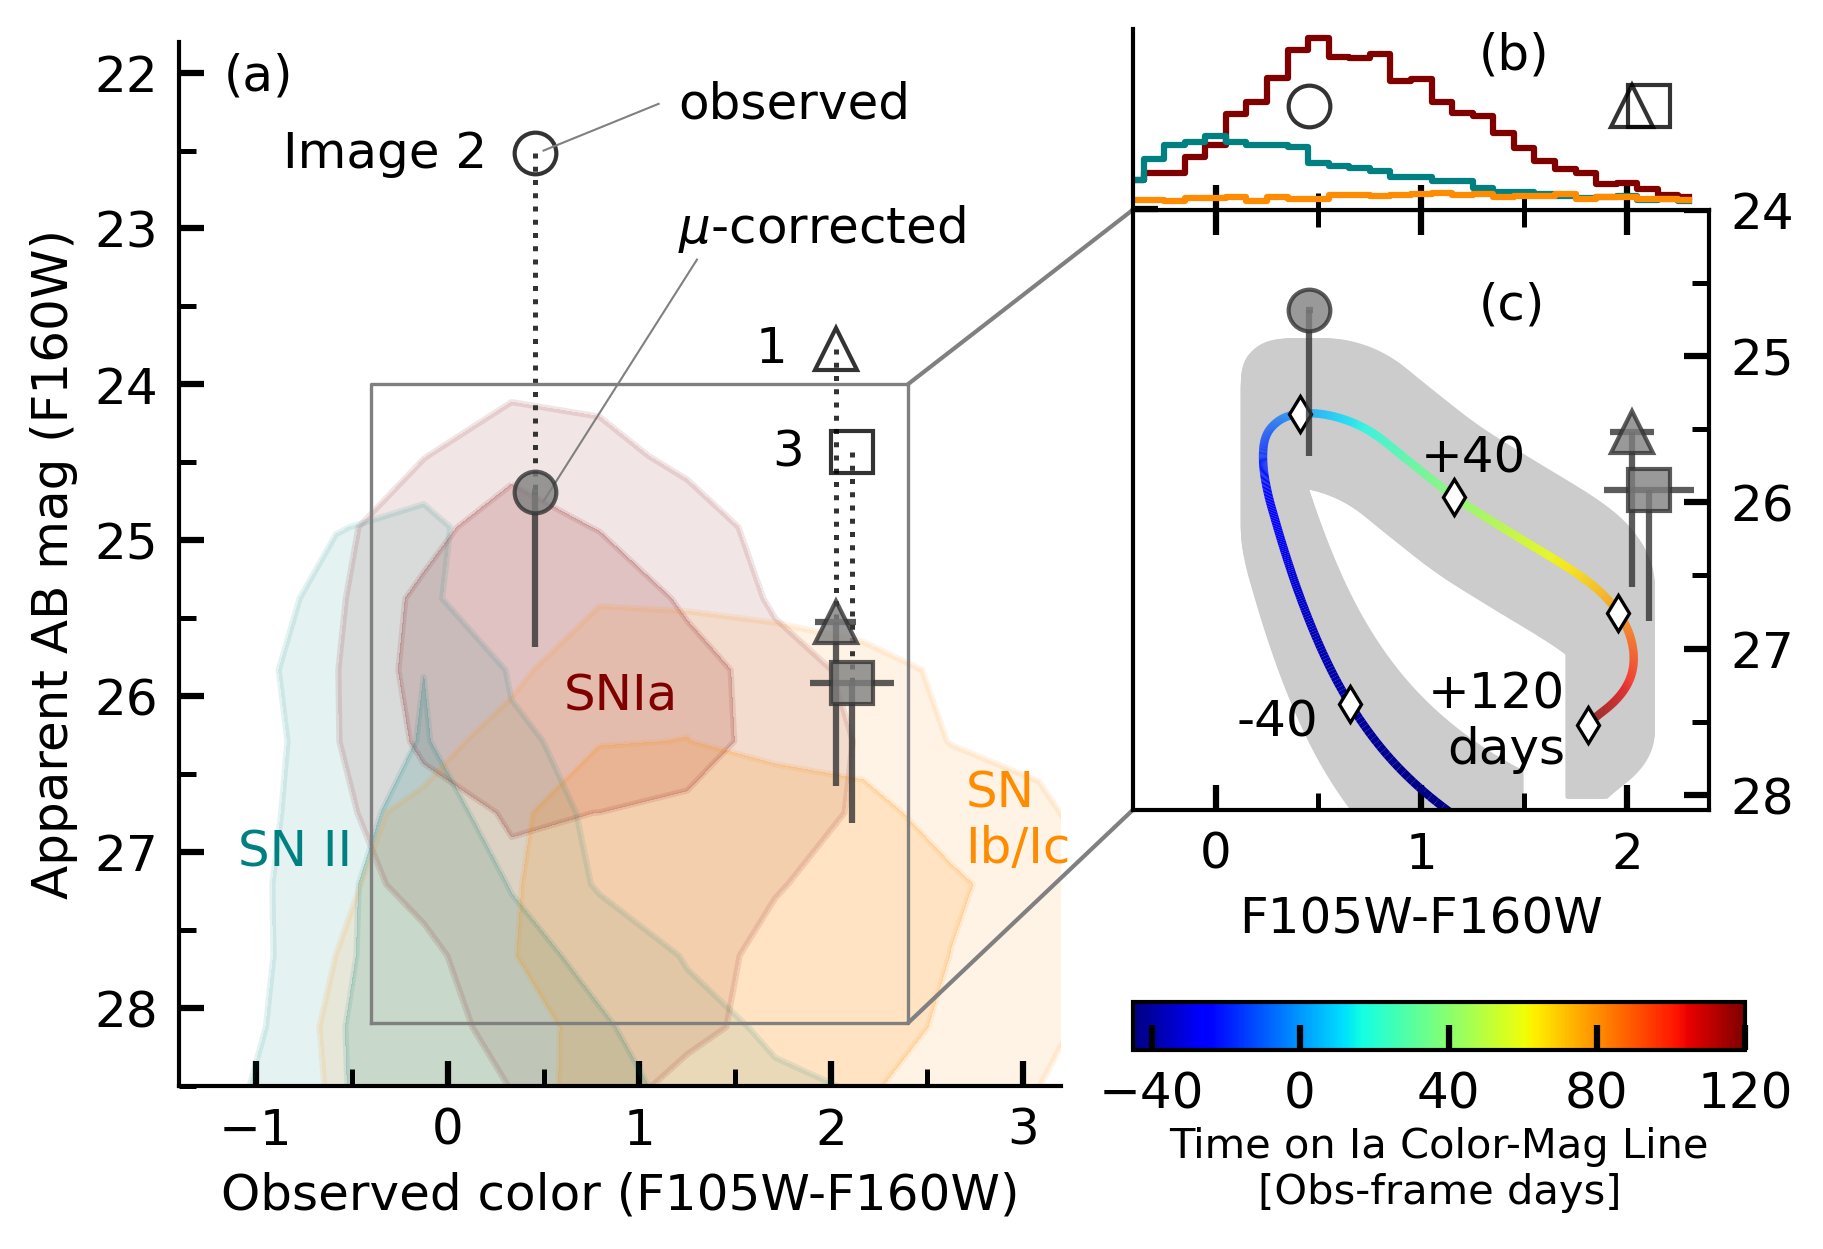

In [71]:
nbins = 12
markertypes =  ['^','o','s']
markersize=10
label_times=True
showcontours = True
marker_alpha=0.8

fig = plt.figure(figsize=[6,4])

# First subplot : the colored contours showing the simulated SN populations
axmain = fig.add_axes([0.09, 0.12, 0.49, 0.87])
axmain.spines['right'].set_visible(False)
axmain.spines['top'].set_visible(False)

# Second axes : the colored line showing time evolution for a SNIa
# (and a separate axes instance for the colorbar
cbaxes = fig.add_axes([0.62, 0.15, 0.34, 0.04])
axzoom = fig.add_axes([0.62, 0.35, 0.32, 0.5])
axhist = fig.add_axes([0.62, 0.85, 0.32, 0.15], sharex=axzoom)

axhist.spines['right'].set_visible(False)
axhist.spines['top'].set_visible(False)


if showcontours:
    contours = colormag.plotcontours(
        sim1, sim2, sim3=sim3,
        band1='f105w',band2='f160w',band3='f160w',colorcolor=False,
        nbins=nbins,contour_range=contour_range, alpha=0.1, ax=axmain)

# thin grey box showing where we zoom into on the side
x0,x1 = color_range_zoom
y0,y1 = mag_range_zoom
axmain.plot([x0, x0, x1, x1, x0],
            [y0, y1, y1, y0, y0],
            ls='-', marker=' ', lw=0.8, color='0.5')


## -----------------  The Zoom-in Plot + Colorbar ---------------------------
# on the zoom-in axes plot the colored line and time-marker diamonds
c,m105,m160,t = colormag.get_sn_model_color_mag_time_data(
    c=0, do_dust=False, return_obsframe_time=True, 
    tmin=-45, tmax=120, tsteps=1000 )
z = 1.95
colorout = colormag.colorline(c, m160, z=t, norm=None,
                              do_times=False, #t=t/(1+z), t_step=40,
                              cmap=plt.get_cmap('jet'), linewidth=2,
                              ax=axzoom)

for dm in np.arange(-0.5,0.5,0.01):
    #axzoom.fill_between(c, m160, m160+dm, color='0.8', alpha=1)
    for dc in np.arange(-0.1,0.1,0.01):
        axzoom.fill_betweenx(m160+dm, c, c+dc, color='0.8', alpha=1)

clrbar = plt.colorbar(colorout, ticks=[-40,0,40,80,120], 
                      orientation='horizontal', cax=cbaxes)
i_time_markers = np.where(t%40<0.15)[0]
axzoom.plot(c[i_time_markers], m160[i_time_markers],
        marker='d', color='w', mec='k', mew=0.8, ms=6, ls=' ', zorder=10)


axzoom.yaxis.set_label_position('right')
axzoom.yaxis.tick_right()
axzoom.xaxis.set_ticks_position('both')
#axzoom.xaxis.tick_top()
#axzoom.tick_params(axis="x",direction="in", pad=-22)

# list of lens models to use for defining lens model uncertainty:
lensidlist = ['A','B','C','D','E'] 
bestlensmodel = 'E'

# -------------------  Plotting SN Data points -------------------------
# Plot the magnification-corrected 
#  color-magnitudes. On ax1 also show the original (uncorrected) color-mags
#  and a dotted line showing the mu correction
for ax in [axmain, axzoom, axhist]:
    for snid, marker in zip([1, 2, 3], markertypes):
        # photometry as observed
        mobs = snreq.magnitude(snid, 'f160w')
        mcorr, mcorrerr = snreq.model_corrected_magnitude_and_err(
            snid, bestlensmodel, 'f160w')
        col, colerr = snreq.color_and_err(snid, 'f105w', 'f160w')
        merr_sys = snreq.magnitude_err_sys(snid, 'f160w',
                                           bestlensmodel=bestlensmodel)
        merr_obs = snreq.magnitude_err_obs(snid, 'f160w')

        if ax == axmain:
            # Open symbols as observed, on the main axes
            ax.vlines(col, mobs, mcorr, ls=':', lw=1.2, color='0.2')
            ax.plot(col, mobs, 
                    alpha=marker_alpha, marker=marker,
                    color='black', markersize=markersize, fillstyle='none')

        if ax == axhist: 
            # Open symbols at arbitrary height on the histogram inset
            ax.plot(col, 0.6*histxvals_list[0].max(), 
                    alpha=marker_alpha, marker=marker,
                    color='black', markersize=markersize, fillstyle='none')
        else:
            # Filled symbols on the main and zoom axes
            ax.errorbar(col, mcorr, yerr=merr_sys, xerr=colerr,
                        marker=marker, alpha=marker_alpha, mfc='0.5', 
                        color='0.2', markersize=markersize, zorder=20)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

axmain.set_ylabel('Apparent AB mag (F160W)')
axmain.set_xlabel('Observed color (F105W-F160W)')

axmain.set_xlim(color_range_wide[0], color_range_wide[1])
axmain.set_ylim(mag_range_wide[0], mag_range_wide[1])

axzoom.set_xlim(color_range_zoom[0], color_range_zoom[1])
axzoom.set_ylim(mag_range_zoom[0], mag_range_zoom[1])
axzoom.set_xlabel('F105W-F160W')



## -----------------  The Histogram Above ---------------------------
if showcontours:
    for histxvals,color in zip(
        histxvals_list, [colorcolorfig._COLOR1, colorcolorfig._COLOR2, colorcolorfig._COLOR3]):
        histrescalefactor = priors_from_host_data[sim.sntype]
        axhist.plot(histxbins[:-1], histxvals,  color=color, 
                    drawstyle='steps-mid', marker=' ', ls='-') #alpha=0.3)
#axhist.set_ylim(0, 1)
#axhist.set_xlabel('F105W-F160W')
## -------------------------------------------------------------------



## ------------ Labels and lines -----------------------------

# MAIN PANEL
# Label the contours:
axmain.text(1.2,26, 'SNIa', color='maroon', ha='right', va='center')
axmain.text(-0.5,27, 'SN II', color='teal', ha='right', va='center')
axmain.text(2.7,26.8, 'SN\nIb/Ic', color='darkorange', ha='left', va='center')

# Label the observed photometry points
axmain.text(snreq.color_and_err(1, 'f105w', 'f160w')[0]-0.25,
         snreq.magnitude(1, 'f160w'),
         '1', ha='right', va='center')
axmain.text(snreq.color_and_err(2, 'f105w', 'f160w')[0]-0.25,
         snreq.magnitude(2, 'f160w'),
         'Image 2', ha='right', va='center')
axmain.text(snreq.color_and_err(3, 'f105w', 'f160w')[0]-0.25,
         snreq.magnitude(3, 'f160w'),
         '3', ha='right', va='center')

axmain.text(1.2,22.2,'observed', ha='left', va='center')
axmain.text(1.2,23,'$\mu$-corrected', ha='left', va='center')
axmain.plot([0.5, 1.1], [22.5,22.2], ls='-', lw=0.5, color='0.5')
axmain.plot([0.5, 1.3], [24.75,23.2], ls='-', lw=0.5, color='0.5')


# ZOOM PANEL 
# label the time-marker diamonds on the colorline
if label_times:
    axzoom.text(0.5, 27.5, '-40', ha='right', va='center', color='k')
    #ax2.text(0.2, 25.5, 't=0', ha='right', va='center', color='k')
    axzoom.text(1., 25.7, '+40', ha='left', va='center', color='k')
    #ax2.text(2.2, 26.8, '+80', ha='left', va='center', color='k')
    axzoom.text(1.7, 27.5, '+120\ndays', ha='right', va='center', color='k')

# Label the colorbar 
clrbar.set_label("Time on Ia Color-Mag Line\n[Obs-frame days]", rotation=0, labelpad=2, size='small')

# Zoom box connecting lines
con1 = ConnectionPatch(xyA=[color_range_zoom[1], mag_range_zoom[0]],
                      xyB=[color_range_zoom[0], mag_range_zoom[0]], 
                      coordsA="data", coordsB="data",
                      axesA=axmain, axesB=axzoom, color="0.5")
con2 = ConnectionPatch(xyA=[color_range_zoom[1], mag_range_zoom[1]],
                      xyB=[color_range_zoom[0], mag_range_zoom[1]], 
                      coordsA="data", coordsB="data",
                      axesA=axmain, axesB=axzoom, color="0.5")
axzoom.add_artist(con1)
axzoom.add_artist(con2)


axmain.text(0.05,0.99,'(a)', transform=axmain.transAxes, ha='left', va='top')
axhist.text(0.6,0.99,'(b)', transform=axhist.transAxes, ha='left', va='top')
axzoom.text(0.6,0.88,'(c)', transform=axzoom.transAxes, ha='left', va='top')

plt.setp(axhist.get_yticklabels(), visible=False)
plt.setp(axhist.get_xticklabels(), visible=False)


plt.tight_layout()
plt.savefig("../../Paper/Figures/snRequiem_classcontours_timeline_hist.pdf", transparent=True)
plt.savefig("../../Paper/Figures/snRequiem_classcontours_timeline_hist.png", transparent=True)